This notebook imports and explores the cleaned up data from the EICU for Tropical Cyclone Debbie. 

The working directory for this project is: 

*\\nas\gemd\georisk\HaRIA_B_Wind\projects\impact_forecasting\data\exposure\QLD*

**Date: January 2018, Creator: Claire Krause**

The data have been combined with the Tropical Cyclone Debbie local wind field (http://pid.geoscience.gov.au/dataset/112861)
. The netcdf outputs from the model were converted to Geotiffs using gdal_translate 

`e.g. gdal_translate -of GTiff NETCDF:combined_alltimes_accum_ls_rainrate_stage4_ens00.nc:lsrain combined_alltimes_accum_ls_rainrate_stage4_ens00.tif`

The Geotiffs were then read into ArcGIS, along side the EICU data. The model raster value at each EICU location was determined using the following code:

`import arcpy
from arcpy.sa import *
arcpy.CheckOutExtension('Spatial')
ExtractValuesToPoints("<observation_points>", "<TCRMwindfield>.tif", "<outputlayername>", "NONE", "VALUE_ONLY")`

The raster values were exported to a .txt file, and added to the final columns of the EICU data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context("poster")

# Read in the data

In [14]:
filename = "//nas/gemd/georisk/HaRIA_B_Wind/projects/impact_forecasting/data/exposure/QLD/QLD_RDA_TCDebbie_cleaned_windfield_vals.csv"
df = pd.read_csv(filename, na_values=-9999)
df

,Longitude,Latitude,OBJECTID,USERID,STREETNUM,STREETNAME,LOCALITY,LGA,SURVEYDATE,CONDITION,...,last_edite,created_da,last_edi_1,LEVELS,GlobalID,_indices__,_indices_1,_indices_2,FMETimesta,TC_Debbie_local_wind
0,148.581326,-20.401410,157,Matt Holliday,0,main,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:38:13,Severe,...,GISADMIN,2017-03-28T06:02:04,2017-03-30T10:32:35,2,{DC911542-1FC8-457E-B5EA-6E197701C308},,,,2017-07-12T16:06:02,26.528141
1,148.567014,-20.396866,158,Matt Holliday,0,cystralbrook,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:27:06,Severe,...,GISADMIN,2017-03-28T06:02:04,2017-04-06T05:29:18,0,{FCC7E227-F0D5-4C97-99D0-ABF981D7BA90},,,,2017-07-12T16:06:02,27.497623
2,148.568735,-20.399978,159,Marc Herbert,6,Jone st,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:22:00,Moderate,...,FFANG,2017-03-28T06:02:04,2017-04-18T06:32:25,0,{C7891B09-9EF7-42BB-BABF-0FEDD3924F2C},,,,2017-07-12T16:06:02,28.291470
3,148.571199,-20.400335,160,Marc Herbert,0,Faunt street,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:19:09,Severe,...,GISADMIN,2017-03-28T06:02:04,2017-04-06T05:34:08,0,{383C77AC-897B-42A5-84BD-8C914D4BF4DF},,,,2017-07-12T16:06:02,26.016441
4,148.578230,-20.401093,161,Marc Herbert,3,Faunt street,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:12:05,Moderate,...,FFANG,2017-03-28T06:02:04,2017-04-13T05:44:46,0,{F771C0FD-6693-4A9B-B418-E4A724357913},,,,2017-07-12T16:06:02,26.480541
5,148.578404,-20.401128,162,Marc Herbert,1,Faunt street,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:08:56,Minor,...,FFANG,2017-03-28T06:02:04,2017-04-13T05:44:46,0,{53F60773-3A63-4154-BB51-B03A77F423AC},,,,2017-07-12T16:06:02,26.480541
6,148.580604,-20.402171,163,Marc Herbert,0,Dobbins Land,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T15:00:10,Minor,...,GISADMIN,2017-03-28T06:02:04,2017-04-06T06:18:07,0,{068A32DE-D87B-4B4C-BACA-E0869766009A},,,,2017-07-12T16:06:02,26.539207
7,148.583022,-20.402298,164,Marc Herbert,0,Chapman street,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T14:54:34,Severe,...,GISADMIN,2017-03-28T06:02:04,2017-04-06T05:57:45,0,{1F4CDB55-00F9-4126-8491-42F571AF616D},,,,2017-07-12T16:06:02,26.572556
8,148.583022,-20.402273,165,Marc Herbert,0,Chapman street,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T14:48:31,Severe,...,FFANG,2017-03-28T06:02:04,2017-04-18T05:33:31,0,{A726F58E-6663-406D-99E7-50555167CB55},,,,2017-07-12T16:06:02,26.572556
9,148.583412,-20.401399,166,Marc Herbert,0,Cnr Main and Chapman street,PROSERPINE,WHITSUNDAY REGIONAL,2017-03-28T14:45:23,Severe,...,FFANG,2017-03-28T06:02:04,2017-04-13T05:14:33,0,{E4A4FF89-B1F4-41CB-BF99-AA0AD42233F4},,,,2017-07-12T16:06:02,26.553814


In [5]:
df.columns

Index([u'Longitude', u'Latitude', u'OBJECTID', u'USERID', u'STREETNUM',
       u'STREETNAME', u'LOCALITY', u'LGA', u'SURVEYDATE', u'CONDITION',
       u'BUILDTYPE', u'BUSINESS_OPERATION', u'HABITABLE', u'OCCUPIED',
       u'WALLTYPE', u'ROOFTYPE', u'WATERHEIGHT', u'HAZARD1', u'HAZARD2',
       u'HAZARD3', u'TASK1', u'TASK2', u'TASK3', u'RECOVSUP1', u'RECOVSUP2',
       u'VULNPERS1', u'VULNPERS2', u'ANIMWELF', u'COMMENTS', u'ARCHIVE',
       u'PHOTOLINK', u'created_user', u'last_edited_user', u'created_date',
       u'last_edited_date', u'LEVELS', u'GlobalID', u'_indices__.x',
       u'_indices__.y', u'_indices__.z', u'FMETimestamp'],
      dtype='object')

In [6]:
df = df.fillna('Not given')

# Can we find a tree damage threshold?

In [15]:
tree_text = df[df['COMMENTS'].str.contains('tree|branch', case = False)]
tree_text.shape

(456, 42)

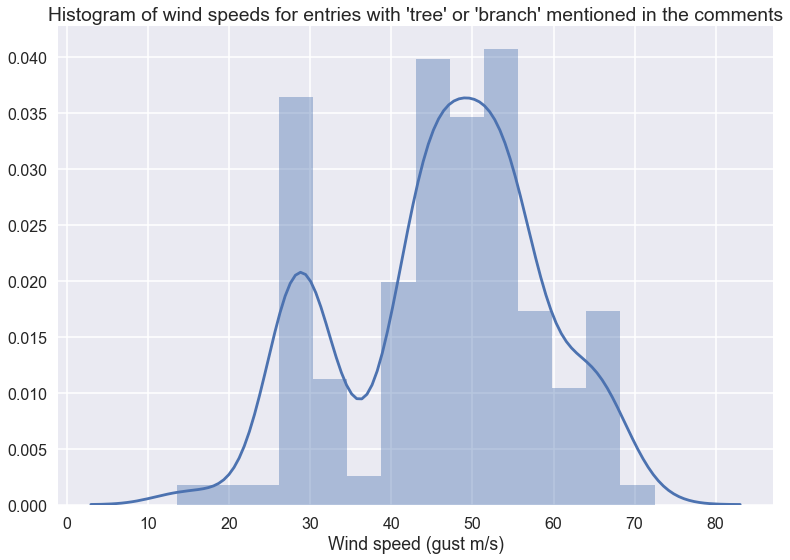

In [19]:
sns.distplot(tree_text.TC_Debbie_local_wind.dropna())
plt.title('Histogram of wind speeds for entries with \'tree\' or \'branch\' mentioned in the comments')
plt.xlabel('Wind speed (gust m/s)')

## For comparison, what are the distributions of wind at all locations?

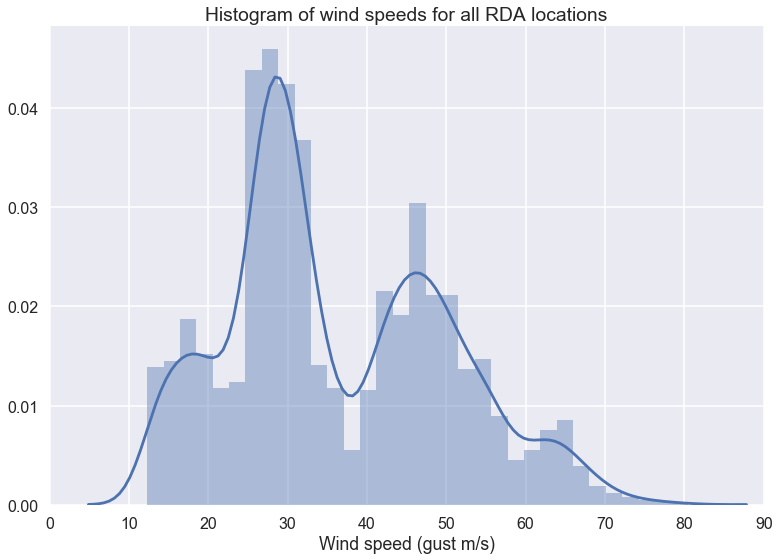

In [21]:
sns.distplot(df.TC_Debbie_local_wind.dropna())
sns.plt.xlim(0, 90, 10)
plt.title('Histogram of wind speeds for all RDA locations')
plt.xlabel('Wind speed (gust m/s)')